# Train FM with DNE [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nanboy-Ronan/DNE-foundation-model-fairness/blob/main/finetune_fm_with_dne.ipynb)

This notebook demos how to add DNE on the images.

In [2]:
!git clone https://github.com/Nanboy-Ronan/DNE-foundation-model-fairness
%cd DNE-foundation-model-fairness

Cloning into 'DNE-foundation-model-fairness'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 58 (delta 21), reused 47 (delta 14), pack-reused 0
Receiving objects: 100% (58/58), 103.69 KiB | 3.70 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/DNE-foundation-model-fairness


Download the dataset and pretrained FM.

In [14]:
%mkdir meta_data
%mkdir checkpoints
%mkdir data

In [15]:
%cd meta_data
!gdown 1U95sIzgAdFjgbdvW2zxGCnFX3qawvMDq # train metadata
!gdown 1fmQqy1h8NnvAncLuxUNka22DslVmLsz2 # test metadata
%cd ..

/content/DNE-foundation-model-fairness/meta_data
Downloading...
From: https://drive.google.com/uc?id=1U95sIzgAdFjgbdvW2zxGCnFX3qawvMDq
To: /content/DNE-foundation-model-fairness/meta_data/train.csv
100% 1.60M/1.60M [00:00<00:00, 97.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fmQqy1h8NnvAncLuxUNka22DslVmLsz2
To: /content/DNE-foundation-model-fairness/meta_data/valid.csv
100% 91.5k/91.5k [00:00<00:00, 53.0MB/s]
/content/DNE-foundation-model-fairness


The below is the condensed dataset where we take it from the original CheXpert. Note that we only hold this temperarily for demo purpose and will delete in the future. Follow this link to download it in case its deleted https://stanfordmlgroup.github.io/competitions/chexpert/

In [3]:
%cd data
!gdown 1Q_3NA0E-iZpSgjBbrIMy5sVT8Gl3pVcP # condense CheXpert dataset.
!unzip CheXpert-v1.0-small.zip
!rm -f CheXpert-v1.0-small.zip
%cd ..

流式输出内容被截断，只能显示最后 5000 行内容。
   creating: CheXpert-v1.0-small/train/patient63180/
   creating: CheXpert-v1.0-small/train/patient63180/study1/
  inflating: CheXpert-v1.0-small/train/patient63180/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63181/
   creating: CheXpert-v1.0-small/train/patient63181/study1/
  inflating: CheXpert-v1.0-small/train/patient63181/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63181/study2/
  inflating: CheXpert-v1.0-small/train/patient63181/study2/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63181/study3/
  inflating: CheXpert-v1.0-small/train/patient63181/study3/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63182/
   creating: CheXpert-v1.0-small/train/patient63182/study1/
  inflating: CheXpert-v1.0-small/train/patient63182/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63183/
   creating: CheXpert-v1.0-small/train/patient63183/study1/
  infl

In [36]:
%cd checkpoints
!gdown 10wqOFCkhyWp6JdSFADrH6Xu9e1am3gXJ
%cd ..

/content/DNE-foundation-model-fairness/DNE-foundation-model-fairness/checkpoints
Downloading...
From (original): https://drive.google.com/uc?id=10wqOFCkhyWp6JdSFADrH6Xu9e1am3gXJ
From (redirected): https://drive.google.com/uc?id=10wqOFCkhyWp6JdSFADrH6Xu9e1am3gXJ&confirm=t&uuid=d2f7e2bb-de2b-40ec-8ee2-4235e6d41e51
To: /content/DNE-foundation-model-fairness/DNE-foundation-model-fairness/checkpoints/vit-b_CXR_0.5M_mae.pth
100% 1.34G/1.34G [00:16<00:00, 82.7MB/s]
/content/DNE-foundation-model-fairness/DNE-foundation-model-fairness


In [4]:
!pip install timm
!pip install libauc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Finetune with ERM

To demonstrate, we first finetune the FM with **empirical risk minimization** (what we do normally).

In [37]:
! OMP_NUM_THREADS=1 CUDA_VISIBLE_DEVICES=0 python -m torch.distributed.launch \
    --nproc_per_node=1 \
    --master_port=12345 \
    --use_env finetune_fm.py \
    --output_dir "./output/ERM/" \
    --log_dir "./output/ERM/" \
    --batch_size 128 \
    --finetune "./checkpoints/vit-b_CXR_0.5M_mae.pth" \
    --epochs 50 \
    --blr 2.5e-4 --layer_decay 0.55 --weight_decay 0.05 \
    --model vit_base_patch16 \
    --warmup_epochs 5 \
    --drop_path 0.2 --mixup 0 --cutmix 0 --reprob 0 --vit_dropout_rate 0 \
    --data_path "./data" \
    --num_workers 4 \
    --nb_classes 2 \
    --eval_interval 10 \
    --min_lr 1e-5 \
    --build_timm_transform \
    --aa 'rand-m6-mstd0.5-inc1' \
    --dataset "chexpert"  \
    --disease "Pleural" \
    --csv_path "./meta_data/" \
    --colab | tee -a ERM.log

/usr/local/lib/python3.10/dist-packages/torch/distributed/launch.py:183: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use-env is set by default in torchrun.
If your script expects `--local-rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
2024-07-09 03:27:46.546569: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 03:27:46.546625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 03:27:46.548054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to regis

### Group Metrics Comparison

| Metric                              | ERM  | DNE  |
|-------------------------------------|------|------|
| Accuracy                            | 69   | xxx  |
| EO for Negative Class | 48.5 | xxx  |
| EO for Positive Class | 57.5 | xxx  |
| Disparate Impact                    | 0.59 | xxx  |

## Finetune with pretrained DNE

Now, we **finetune the FM with DNE**. DNE (Debiased Noise Editing) is a vector that can be added on the image when training to mitigate the spruious correlation.

We first download our pretrained DNE vector.

In [5]:
!gdown 1FERRX2nxWsIH3bNqt_hQIYrZq5tHeHlu

Downloading...
From: https://drive.google.com/uc?id=1FERRX2nxWsIH3bNqt_hQIYrZq5tHeHlu
To: /content/dne_layer.pt
100% 202k/202k [00:00<00:00, 39.9MB/s]


In [41]:
! OMP_NUM_THREADS=1 CUDA_VISIBLE_DEVICES=0 python -m torch.distributed.launch \
    --nproc_per_node=1 \
    --master_port=12345 \
    --use_env finetune_fm.py \
    --output_dir "./output/DNE" \
    --log_dir "./output/DNE" \
    --batch_size 128 \
    --finetune "./checkpoints/vit-b_CXR_0.5M_mae.pth" \
    --epochs 50 \
    --blr 2.5e-4 --layer_decay 0.55 --weight_decay 0.05 \
    --model vit_base_patch16 \
    --warmup_epochs 5 \
    --drop_path 0.2 --mixup 0 --cutmix 0 --reprob 0 --vit_dropout_rate 0 \
    --data_path "./data" \
    --num_workers 4 \
    --nb_classes 2 \
    --eval_interval 10 \
    --min_lr 1e-5 \
    --build_timm_transform \
    --aa 'rand-m6-mstd0.5-inc1' \
    --dataset "chexpert"  \
    --disease "Pleural" \
    --adddne \
    --dne_path "./dne_layer.pt" \
    --csv_path "./meta_data/" \
    --colab | tee -a DNE.log

/usr/local/lib/python3.10/dist-packages/torch/distributed/launch.py:183: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use-env is set by default in torchrun.
If your script expects `--local-rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
2024-07-09 04:27:40.257931: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 04:27:40.257983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 04:27:40.259324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to regis

DNE improves the fairness.

### Group Metrics Comparison

| Metric                              | ERM  | DNE  |
|-------------------------------------|------|------|
| Accuracy                           | 69   | 74.25  |
| EO for Negative Class | 48.5 | 25  |
| EO for Positive Class | 57.5 | 23  |
| Disparate Impact                   | 0.59 | 0.26  |

## Interpretability

Let's visualize the heatmap to interprete the DNE.

In [9]:
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
import numpy as np

from engine_finetune import DNELayer
from util.dataloader_med import CheXpertDatasetFCRO

In [12]:
dne_state_dict = torch.load("./dne_layer.pt", map_location=torch.device("cpu"))
dne_layer = DNELayer((224,224))
dne_layer.load_state_dict(dne_state_dict)

<All keys matched successfully>

In [16]:
transform_train = transforms.Compose([
                    transforms.Resize((224, 224)),
                    transforms.ToTensor(),
                    ])

target_labels = [
                "No Finding",
                "Pleural Effusion",
            ]

dataset = CheXpertDatasetFCRO(
                    csv_path="./meta_data/valid.csv",
                    image_root_path="./data/",
                    sensitive_attribute="Sex",
                    target_labels=target_labels,
                    transform=transform_train
                )

In [21]:
def calculate_average_density(dataloader):
    total_density = 0
    count = 0
    for images, _, _ in dataloader:
        if images.shape[1] == 3:
            images = images.mean(dim=1)
        density = images.sum(dim=[1, 2]) / (images.shape[1] * images.shape[2])
        total_density += density.sum().item()
        count += images.size(0)
    average_density = total_density / count
    return average_density

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
average_density = calculate_average_density(dataloader)

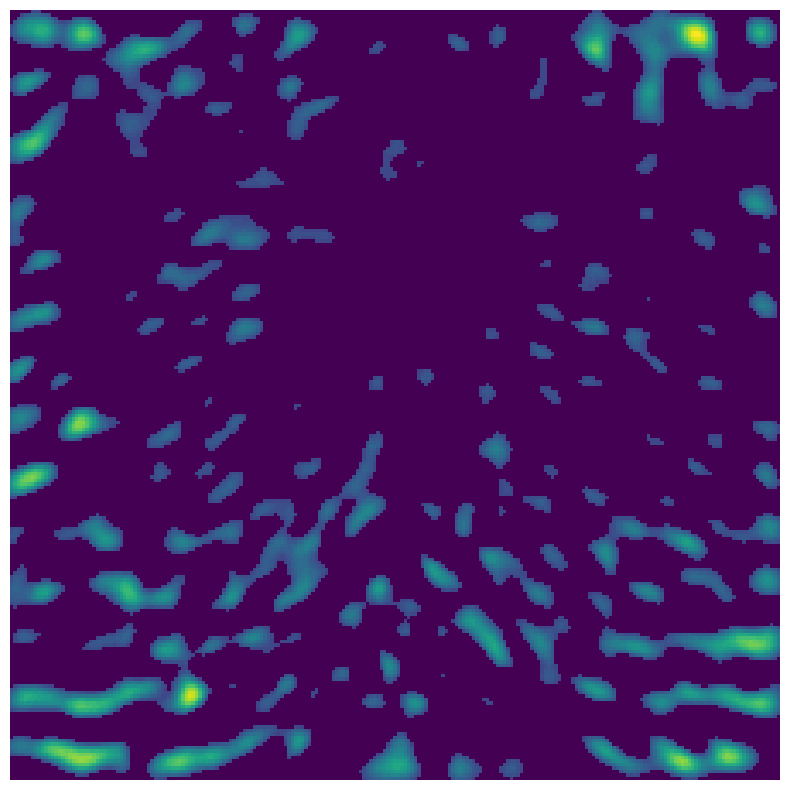

In [22]:
def gaussian_kernel(size, sigma=1.0):
    coords = np.arange(size)
    coords -= size // 2
    g = coords**2
    g = np.exp(-g / (2 * sigma ** 2))
    kernel = np.outer(g, g)
    kernel /= kernel.sum()
    return torch.tensor(kernel, dtype=torch.float32)



tensor = dne_layer.noise.detach().cpu()

kernel_size = 16
sigma = 3
gaussian_k = gaussian_kernel(kernel_size, sigma)
gaussian_k = gaussian_k.expand(1, 1, kernel_size, kernel_size)

tensor_expanded = tensor.unsqueeze(0).unsqueeze(0)

smoothed_tensor = F.conv2d(tensor_expanded, gaussian_k, padding=kernel_size//2)
threshold = torch.quantile(smoothed_tensor, 0.8)

top_20_mask = smoothed_tensor > threshold

highlighted_tensor = smoothed_tensor * top_20_mask

highlighted_img = highlighted_tensor.squeeze().numpy()
highlighted_img = (highlighted_img) / average_density
highlighted_img = np.uint8(255 * highlighted_img)


plt.figure(figsize=(10, 10))
plt.imshow(highlighted_img)
plt.axis('off')
plt.savefig("./noise_local1_reg0.01.png", bbox_inches="tight")
plt.show()
